# Assignment 4 (Q1)

## Q1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
# Loading Dataset
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# Performing EDA and Data Visualizations

In [4]:
df.info() # To get information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [5]:
df.isnull().sum() # To check if there are any missing values

Delivery Time    0
Sorting Time     0
dtype: int64

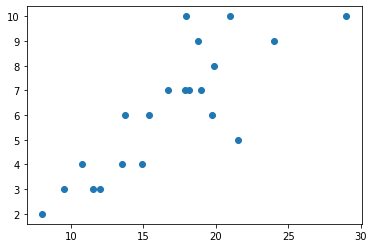

In [6]:
plt.scatter(x=df['Delivery Time'],y=df['Sorting Time'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

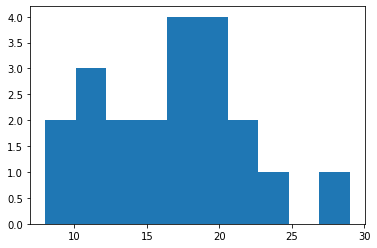

In [7]:
plt.hist(df['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

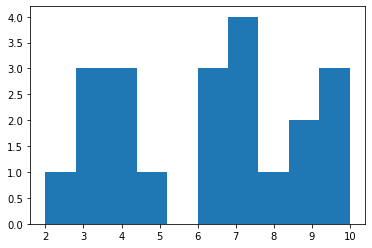

In [8]:
plt.hist(df['Sorting Time'])

<BarContainer object of 21 artists>

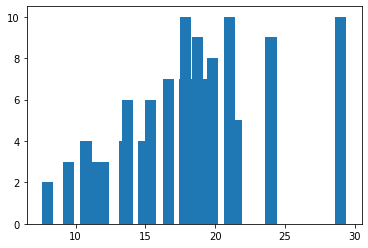

In [9]:
plt.bar(df['Delivery Time'],df['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2caa7bf1320>,
 'caps': [<matplotlib.lines.Line2D at 0x2caa7bf1908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2caa7bf1278>,
 'medians': [<matplotlib.lines.Line2D at 0x2caa7bf1eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2caa7bff160>,
 'means': []}

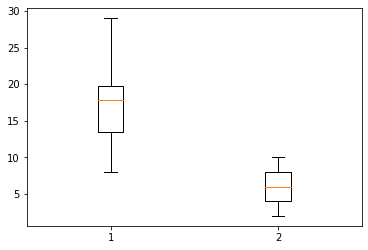

In [10]:
plt.boxplot(df)

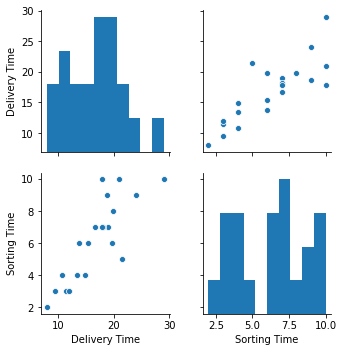

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Delivery Time'>

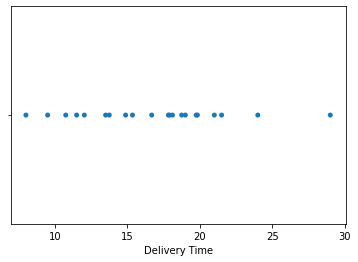

In [12]:
sns.swarmplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time'>

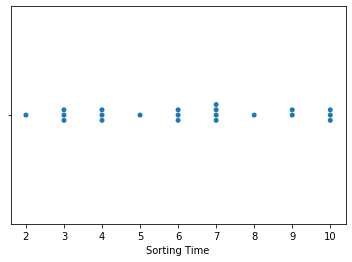

In [13]:
sns.swarmplot(df['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time'>

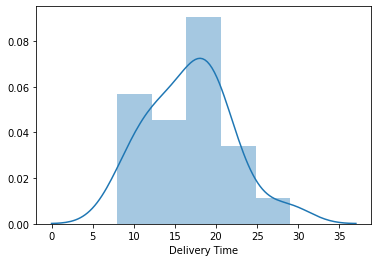

In [14]:
# Plotting distribution plot using seaborn on Delivery Time column
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time'>

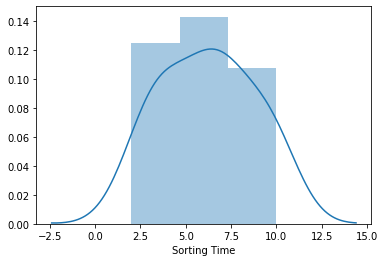

In [15]:
# Plotting distribution plot using seaborn on Sorting Time column
sns.distplot(df['Sorting Time'])

<AxesSubplot:>

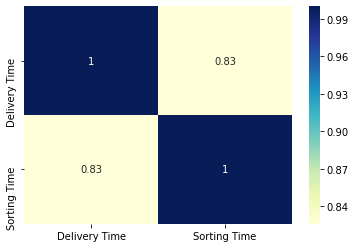

In [16]:
# Correlation
corr = df.corr()
sns.heatmap(corr,cmap='YlGnBu',annot=True)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

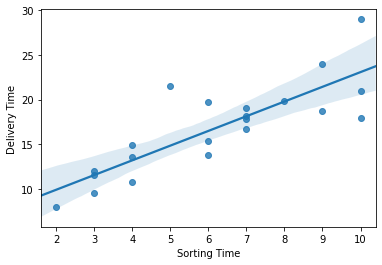

In [17]:
# Plotting regression plot
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

## Feature Engineering 

In [18]:
# Renaming Columns
df=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Model Building

In [19]:
model=sm.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [20]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        22:51:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Finding t-values and p-values
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64, Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [23]:
# Finding Rsquared Value and adjusted rsquare value
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
# Manual prediction for sorting time 5
Delivery_Time = (6.582734) + (1.649020)*(5)
Delivery_Time

14.827834

In [25]:
# Automatic Prediction for sorting time 5, 8
new_df=pd.Series([5,8])
new_df

0    5
1    8
dtype: int64

In [26]:
df_pred=pd.DataFrame(new_df,columns=['Sorting_Time'])
df_pred

,Sorting_Time
0,5
1,8


In [27]:
model.predict(df_pred)

0    14.827833
1    19.774893
dtype: float64